In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [19]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [20]:
len(train_data)

8982

In [21]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results
x_train = vectorize_sequences(train_data, 10000)
x_test = vectorize_sequences(test_data, 10000)

In [22]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension) )
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results
y_train = to_one_hot(train_labels, 46)
y_test = to_one_hot(test_labels, 46)

In [23]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [42]:
model = keras.Sequential([
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=46, activation="sigmoid"),
])

In [43]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [44]:
x_val = x_train[:1000]
x_train = x_train[1000:]
y_val = y_train[:1000]
y_train = y_train[1000:]

In [45]:
history = model.fit(x_train,
                    y_train,
                    epochs=12,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/12
12/12 [==============================] - 2s 89ms/step - loss: 2.9058 - accuracy: 0.4806 - val_loss: 2.0575 - val_accuracy: 0.5740
Epoch 2/12
12/12 [==============================] - 1s 56ms/step - loss: 1.6868 - accuracy: 0.6568 - val_loss: 1.5636 - val_accuracy: 0.6670
Epoch 3/12
12/12 [==============================] - 1s 51ms/step - loss: 1.2948 - accuracy: 0.7140 - val_loss: 1.3628 - val_accuracy: 0.7060
Epoch 4/12
12/12 [==============================] - 1s 48ms/step - loss: 1.0688 - accuracy: 0.7653 - val_loss: 1.2314 - val_accuracy: 0.7400
Epoch 5/12
12/12 [==============================] - 1s 49ms/step - loss: 0.8922 - accuracy: 0.8063 - val_loss: 1.1577 - val_accuracy: 0.7450
Epoch 6/12
12/12 [==============================] - 1s 45ms/step - loss: 0.7549 - accuracy: 0.8353 - val_loss: 1.0907 - val_accuracy: 0.7660
Epoch 7/12
12/12 [==============================] - 1s 47ms/step - loss: 0.6362 - accuracy: 0.8659 - val_loss: 1.0476 - val_accuracy: 0.7710
Epoch 8/12
12

In [46]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Loss')

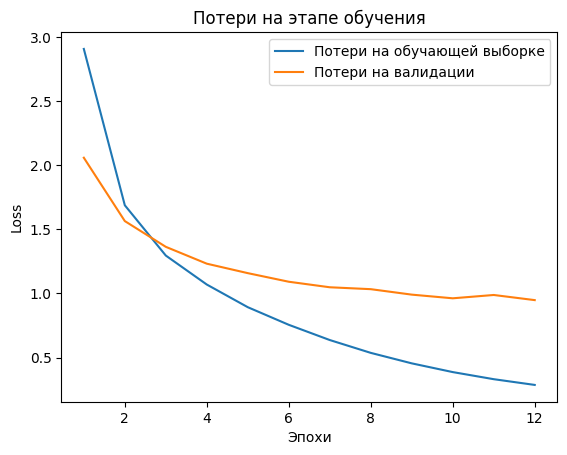

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(train_loss) + 1)
plt.figure()
sns.lineplot(x=epochs, y=train_loss, label="Потери на обучающей выборке")
sns.lineplot(x=epochs, y=val_loss, label="Потери на валидации")
plt.title("Потери на этапе обучения")
plt.xlabel("Эпохи")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

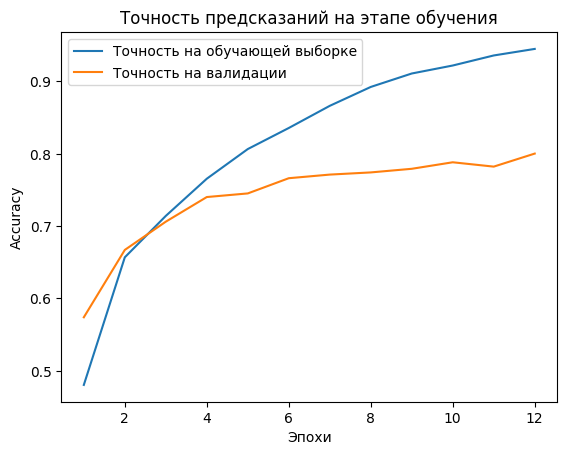

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
train_acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(train_loss) + 1)
plt.figure()
sns.lineplot(x=epochs, y=train_acc, label="Точность на обучающей выборке")
sns.lineplot(x=epochs, y=val_acc, label="Точность на валидации")
plt.title("Точность предсказаний на этапе обучения")
plt.xlabel("Эпохи")
plt.ylabel("Accuracy")

In [49]:
results = model.evaluate(x_test, y_test)
results

71/71 [==============================] - 0s 6ms/step - loss: 0.9982 - accuracy: 0.7836


[0.9981627464294434, 0.7836152911186218]

In [50]:
predictions = model.predict(x_test)
predictions

71/71 [==============================] - 0s 4ms/step


array([[2.2276435e-03, 2.5266260e-02, 1.4149247e-02, ..., 6.4532277e-03,
        3.1523549e-03, 2.7748236e-02],
       [3.2207519e-01, 6.3824117e-01, 3.1571120e-01, ..., 8.5403129e-02,
        6.4661913e-04, 8.0726752e-03],
       [4.9886540e-01, 9.6907151e-01, 6.3197780e-01, ..., 1.3516688e-01,
        1.2546522e-02, 7.9110533e-02],
       ...,
       [8.3541200e-03, 1.7561090e-01, 7.4093468e-02, ..., 6.6525243e-02,
        6.1395403e-02, 2.1341653e-01],
       [9.2343643e-02, 7.8583676e-01, 1.4843552e-01, ..., 2.3751751e-02,
        4.0107332e-02, 5.9466310e-02],
       [4.4110503e-02, 9.6662605e-01, 3.8480705e-01, ..., 4.1039918e-02,
        3.8475392e-03, 4.0371194e-02]], dtype=float32)